<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

# Loading dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/supermarket_sales - Sheet1.csv')

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data description

From: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

**Attribute information**

* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Dataset's dimensions

In [6]:
print(f'{df.shape[1]} columns,')
print(f'{df.shape[0]} rows.')

17 columns,
1000 rows.


## Dataset's info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There is no missing data in the dataset.

In [8]:
pd.DataFrame(df.isna().sum()).transpose()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Treatments in the dataset

## Columns rename

It is chosen to leave the column names with only lowercase characters and without spaces.

In [9]:
df = df.rename(
    columns= {'Invoice ID': 'id', 'Branch': 'branch', 'City': 'city', 'Customer type': 'custumer_type',
              'Gender': 'gender', 'Product line': 'product_line', 'Unit price': 'unit_price', 'Quantity': 'quantity',
              'Tax 5%': 'tax', 'Total': 'total', 'Date': 'date', 'Time': 'time', 'Payment': 'payment', 'Rating': 'rating',
              'gross margin percentage': 'gross_margin', 'gross income': 'gross_income'}
)

In [10]:
df.head(2)

,id,branch,city,custumer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


# Exploratory analysis

## Column `city`

### Sales per city

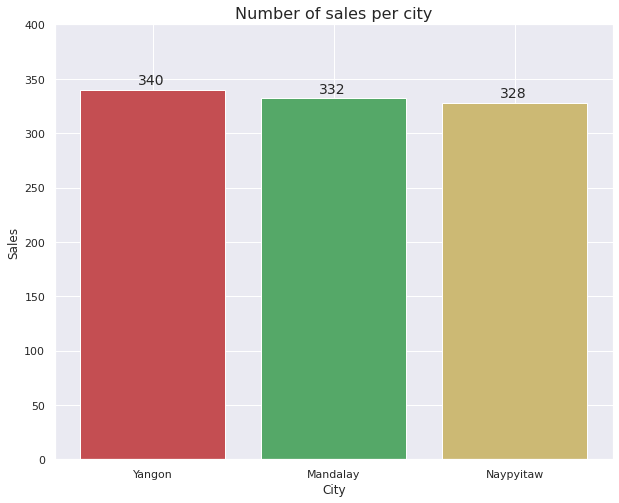

In [54]:
plt.figure(figsize= (10, 8))
ax = plt.bar(
    df['city'].value_counts().keys(),
    df['city'].value_counts().values,
    color= ['r', 'g', 'y']
)
plt.title('Number of sales per city', fontsize= 16)

for bar in ax:
  plt.text(bar.get_x() + 0.32, bar.get_height() + 5, bar.get_height(), fontsize= 14)

plt.ylim([0, 400])
plt.ylabel('Sales')
plt.xlabel('City')
plt.show()

### Sales per city related to other variables

In [112]:
gender_per_city = pd.crosstab(df['city'], df['gender'])
custumer_per_city = pd.crosstab(df['city'], df['custumer_type'])
product_per_city = pd.crosstab(df['city'], df['product_line'])
payment_per_city = pd.crosstab(df['city'], df['payment'])

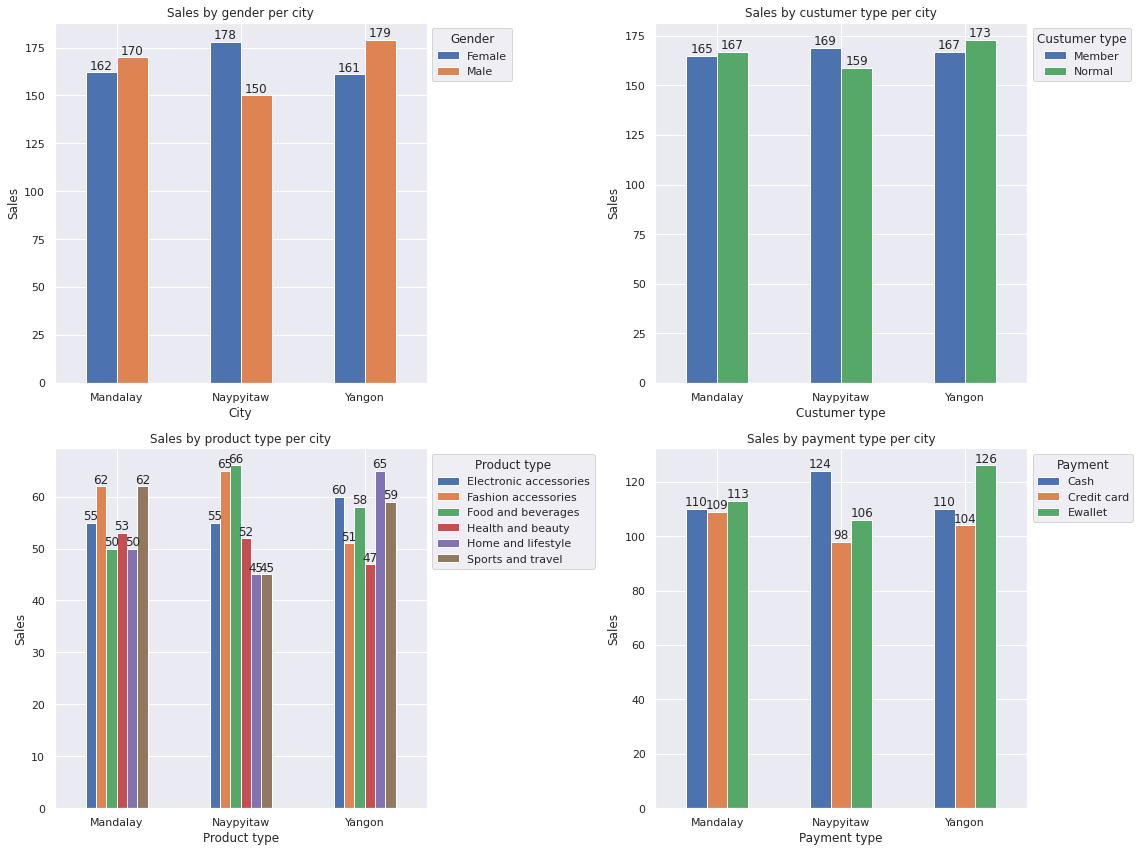

In [116]:
fig, ax = plt.subplots(2, 2, figsize= (16, 12))
ax1 = gender_per_city.plot(kind= 'bar', stacked= False, rot= 0, align= 'center', ax= ax[0, 0])
ax1.set_title('Sales by gender per city')

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge')

ax1.legend(title= 'Gender', bbox_to_anchor= (1, 1))
ax1.set_ylabel('Sales')
ax1.set_xlabel('City')

ax2 = custumer_per_city.plot(kind= 'bar', stacked= False, color= ['b', 'g'], rot= 0, align= 'center', ax= ax[0, 1])
ax2.set_title('Sales by custumer type per city')

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge')

ax2.legend(title= 'Custumer type', bbox_to_anchor= (1, 1))
ax2.set_ylabel('Sales')
ax2.set_xlabel('Custumer type')

ax3 = product_per_city.plot(kind= 'bar', stacked= False, rot= 0, align= 'center', ax= ax[1, 0])
ax3.set_title('Sales by product type per city')

for container in ax3.containers:
  ax3.bar_label(container, label_type= 'edge')

ax3.legend(title= 'Product type', bbox_to_anchor= (1, 1))
ax3.set_ylabel('Sales')
ax3.set_xlabel('Product type')

ax4 = payment_per_city.plot(kind= 'bar', stacked= False, rot= 0, align= 'center', ax= ax[1, 1])
ax4.set_title('Sales by payment type per city')

for container in ax4.containers:
  ax4.bar_label(container, label_type= 'edge')

ax4.legend(title= 'Payment', bbox_to_anchor= (1, 1))
ax4.set_ylabel('Sales')
ax4.set_xlabel('Payment type')

plt.tight_layout()
plt.show()

## Column `gender`

### Sales by gender

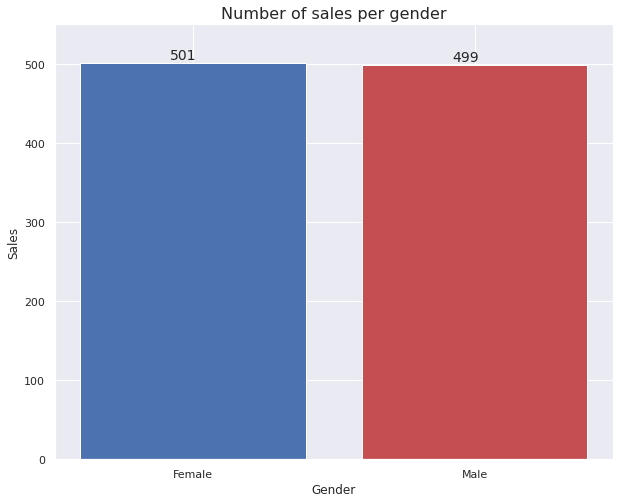

In [126]:
plt.figure(figsize= (10, 8))
ax = plt.bar(
    df['gender'].value_counts().keys(),
    df['gender'].value_counts().values,
    color= ['b', 'r']
)
plt.title('Number of sales per gender', fontsize= 16)

for bar in ax:
  plt.text(bar.get_x() + 0.32, bar.get_height() + 5, bar.get_height(), fontsize= 14)

plt.ylim([0, 550])
plt.ylabel('Sales')
plt.xlabel('Gender')
plt.show()

## Column `custumer_type`

### Sales by custumer type

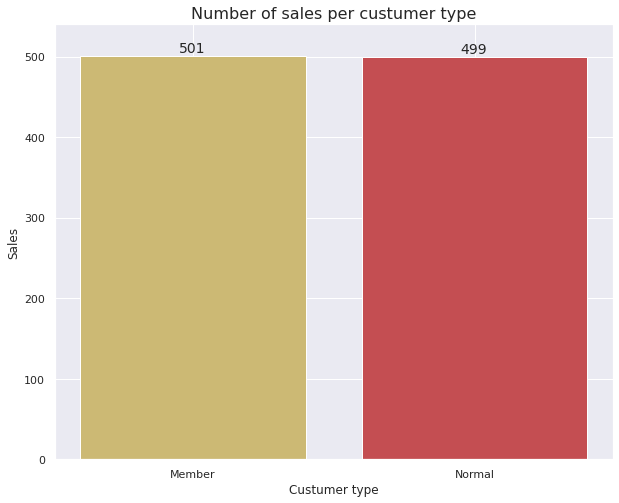

In [56]:
plt.figure(figsize= (10, 8))
ax = plt.bar(
    df['custumer_type'].value_counts().keys(),
    df['custumer_type'].value_counts().values,
    color= ['y', 'r']
)

for bar in ax:
  plt.text(bar.get_x() + 0.35, bar.get_height() + 5, bar.get_height(), fontsize= 14)

plt.title('Number of sales per custumer type', fontsize= 16)
plt.ylim([0, 540])
plt.xlabel('Custumer type')
plt.ylabel('Sales')
plt.show()

### Gender, products and payment in consumer type

In [117]:
custumer_gender = pd.crosstab(df['custumer_type'], df['gender'])
custumer_product = pd.crosstab(df['custumer_type'], df['product_line'])
custumer_payment = pd.crosstab(df['custumer_type'], df['payment'])

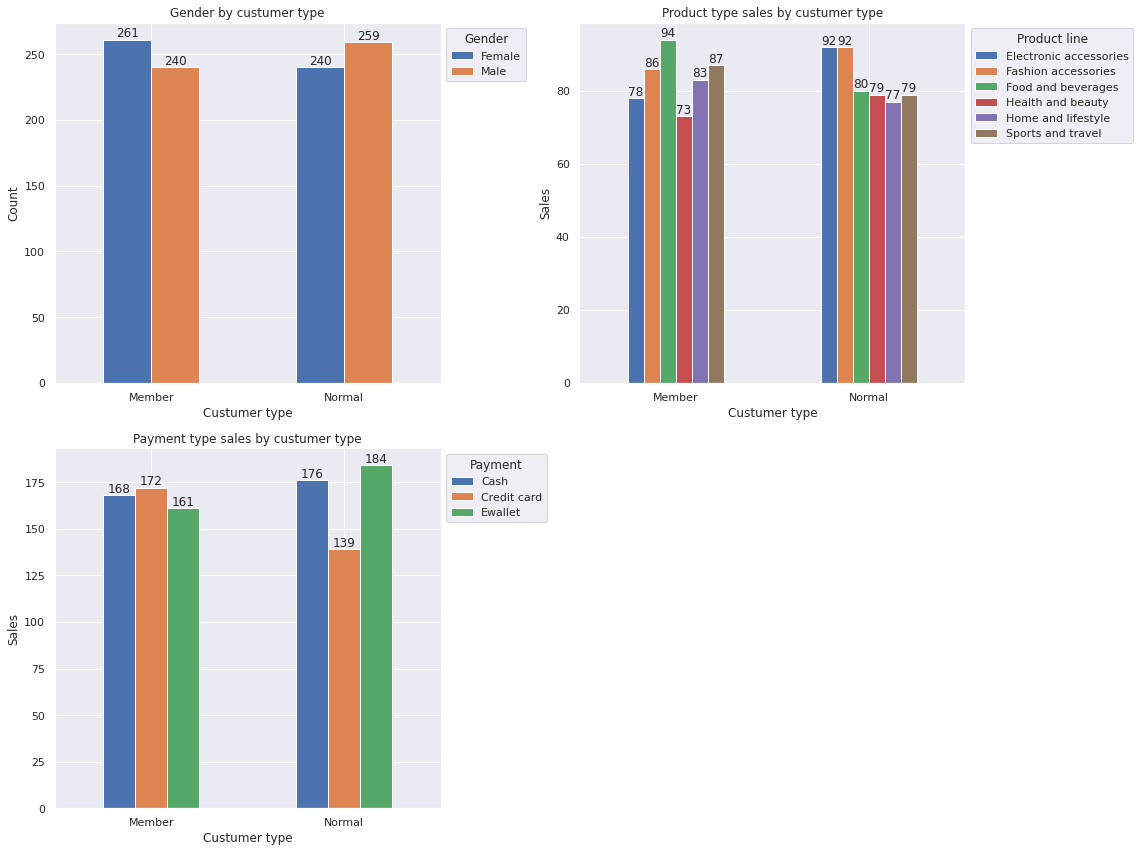

In [121]:
fig, ax = plt.subplots(2, 2, figsize= (16, 12))
ax1 = custumer_gender.plot(kind= 'bar', rot= 0, align= 'center', ax= ax[0, 0])
ax1.set_title('Gender by custumer type')

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge')

ax1.legend(title= 'Gender', bbox_to_anchor= (1, 1))
ax1.set_ylabel('Count')
ax1.set_xlabel('Custumer type')

ax2 = custumer_product.plot(kind= 'bar', rot= 0, align= 'center', ax= ax[0, 1])
ax2.set_title('Product type sales by custumer type')

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge')

ax2.legend(title= 'Product line', bbox_to_anchor= (1, 1))
ax2.set_ylabel('Sales')
ax2.set_xlabel('Custumer type')

ax3 = custumer_payment.plot(kind= 'bar', rot= 0, align= 'center', ax= ax[1, 0])
ax3.set_title('Payment type sales by custumer type')

for container in ax3.containers:
  ax3.bar_label(container, label_type= 'edge')

ax3.legend(title= 'Payment', bbox_to_anchor= (1, 1))
ax3.set_ylabel('Sales')
ax3.set_xlabel('Custumer type')

fig.delaxes(ax[1, 1])
plt.tight_layout()
plt.show()

In [124]:
df.groupby('custumer_type')['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
custumer_type,,,,,,,,
Member,501.0,56.206986,26.739386,10.08,32.25,56.04,79.93,99.96
Normal,499.0,55.135130,26.262452,10.56,33.23,54.28,76.46,99.96
